In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

In [2]:
path = "C:/Users/mary0/Masters- Data Science/Winter 2023/255R/Week4/mystery.dat"
data = np.genfromtxt(path, delimiter=',')

### 1)

#### a)  
We will be using Lasso regression to reduce the number of features used in the model by setting some coefficients(such as noise) to zero; we are suspecting some of the predictors may be irrelevant or have low predictive power which is also why we chose Lasso. We will use the sklearn.linear_model to perform Lasso regression, and we will find the alpha by testing it until we obtain 10 features.

#### b)

In [3]:
x = data [: , :-1]
y = data [ :, -1]

#split data 
x_train , x_test , y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

#model
lasso = Lasso (alpha=0.5) #the value of alpha will affect the # of features
lasso.fit (x_train , y_train)

#coefficients
coefs = lasso.coef_
nonzero_coefs = np.nonzero(coefs)[0] #nonzero coeff

print("Selected Features:", nonzero_coefs + 1)


Selected Features: [ 2  3  5  7 11 13 17 19 23 27]


### 2)

### a)

In [4]:
path = "C:/Users/mary0/Masters- Data Science/Winter 2023/255R/Week4/heart.csv"
df = pd.read_csv(path)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
x = df.iloc[:, :13]
y = df.iloc[:, 13]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=103, random_state=0)

#model
clf = LogisticRegression()
clf.fit(x_train, y_train)

#coeff
coef = clf.coef_[0]
print(coef)

[ 0.01753564 -1.69748779  0.73413667 -0.01082059 -0.00543574 -0.61300226
  0.15843157  0.03380054 -0.77859171 -0.59481527  0.29936063 -0.78359749
 -0.80119124]


C:\Users\mary0\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
#name of the top three features
indices = np.argsort(np.abs(coef))[::-1][:3]
names = x.columns[indices]
print(names)

Index(['sex', 'thal', 'ca'], dtype='object')


#### b)

In [8]:
y_pred = clf.predict(x_test)
accuracy = np.mean(y_pred == y_test)
#error 
test_error = 1 - accuracy
print(test_error)

0.18446601941747576


#### c)

In [9]:
# 5-fold cross-validation on the training set using Logistic Regression-clf
scores = cross_val_score(clf, x_train, y_train, cv=5)
error = 1 - np.mean(scores)
print(error)

0.13969668542839275


C:\Users\mary0\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mary0\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mary0\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mary0\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mary0\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

The error using 5-fold cross-validation was around 4% lower than without. 

### 3)

#### a)

In [10]:
S = set()
test_errors = []
cv_errors = []

for k in range(1,14):
    best_feature = None 
    best_cverror = np.inf
    for f in range(13) : 
        if f in S:
            continue 
        x_traink = x_train.iloc [:, list(S) + [f]]
        x_testk = x_test.iloc [ :, list(S) +[f]]
        clf = LogisticRegression(penalty='l1', solver = 'liblinear')
        cv_scores = cross_val_score (clf, x_traink, y_train, cv=5)
        cv_error = 1- np.mean(cv_scores)
        
        if cv_error < best_cverror: 
            best_cverror = cv_error
            best_feature = f
    
    S.add(best_feature)
    #model with S features
    x_traink = x_train.iloc[:, list(S)]
    x_testk = x_test.iloc[:, list(S)]
    clf = LogisticRegression(penalty='l1' , solver='liblinear')
    clf.fit(x_traink, y_train)
    #test error
    y_pred = clf.predict(x_testk)
    test_error = np.mean( y_pred != y_test)
    #cv error
    cv_scores = cross_val_score (clf, x_traink, y_train, cv=5)
    cv_error = 1 - np.mean(cv_scores)
    
    #errors array
    test_errors.append(test_error)
    cv_errors.append(cv_error)
        

C:\Users\mary0\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mary0\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mary0\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mary0\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


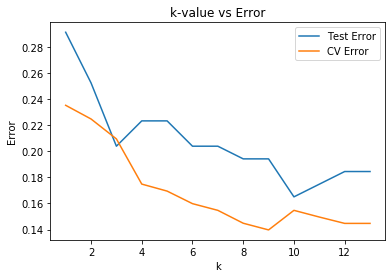

In [11]:
#plot 
plt.plot(range(1, 14), test_errors, label='Test Error')
plt.plot(range(1, 14), cv_errors, label='CV Error')
plt.xlabel('k')
plt.ylabel('Error')
plt.title('k-value vs Error')
plt.legend()
plt.show()

#### b)

In [12]:
S = set()
test_errors = []
cv_errors = []

for k in range(2):
    best_feature = None
    best_cverror = np.inf
    for f in range(13) : 
        if f in S:
            continue 
        x_traink = x_train.iloc [:, list(S) + [f]]
        x_testk = x_test.iloc [ :, list(S) +[f]]
        clf = LogisticRegression(penalty='l1', solver = 'liblinear')
        cv_scores = cross_val_score (clf, x_traink, y_train, cv=5)
        cv_error = 1- np.mean(cv_scores)
        
        if cv_error < best_cverror: 
            best_cverror = cv_error
            best_feature = f
    
    S.add(best_feature)
    #model with S features
    x_traink = x_train.iloc[:, list(S)]
    x_testk = x_test.iloc[:, list(S)]
    clf = LogisticRegression(penalty='l1' , solver='liblinear')
    clf.fit(x_traink, y_train)

selected_features = list(S)
print("Selected features for k=2:", selected_features)

C:\Users\mary0\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mary0\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\mary0\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Selected features for k=2: [9, 12]


In [13]:
name = x.columns[selected_features]
print(name)

Index(['oldpeak', 'thal'], dtype='object')


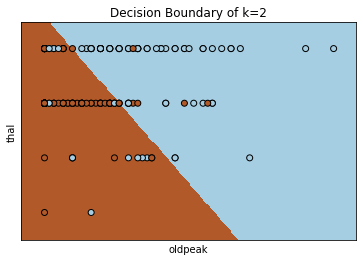

In [14]:
# create mesh to plot in 
h = .02  # step size in the mesh
x_min, x_max = x_traink.iloc[:, 0].min() - .5, x_traink.iloc[:, 0].max() + .5
y_min, y_max = x_traink.iloc[:, 1].min() - .5, x_traink.iloc[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#predict class using logistic
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#result
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x_traink.iloc[:, 0], x_traink.iloc[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('oldpeak')
plt.ylabel('thal')
plt.title('Decision Boundary of k=2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()